# Homework 02

This Jupyter notebook file is a template that we provide for the homework.
You _must_ use this template and follow the instructions.
We require you to store specific intermediate results into _"submission variables"_ to unify the submission.
These values are printed at the _end_ of the jupyter notebook and will be (partially) used to grade your assignment.
Please ensure that these variables have the correct values and aren't overwritten by the following code cells.

In [2]:
# used for submission variables
from copy import deepcopy

In [3]:
# importing libraries
# you can import any that are installed in Docker/Paperspace environment
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import ndimage
import zipfile
from zipfile import ZipFile
from simple_downloader import download
from PIL import Image

## Manually applying filters

In the theoretical lecture, you have seen a way to visualize and _manually_ calculate the convolution results.
Please apply this _manual_ convolution method to the following input array.
For this task, you can only use basic numpy operators (`+ - / @`) and for loops.

Apply the manual convolution method using:
- 0-padding
- Reflection
    - `a b c d` as input leads to the following reflections on the left and right-hand sides:
        - `d c b a | a b c d | d c b a`

In [4]:
"""
Parts left:

1) Creating a reflecting padding and checking its results in part 1
2) How different padding effect results
3) Last section left
"""

'\nParts left:\n\n1) Creating a reflecting padding and checking its results in part 1\n2) How different padding effect results\n3) Last section left\n'

In [5]:
inp_arr = np.array(
    [
        [1, 0, 1],
        [0, 1, 0],
        [0, 0, 0],
    ]
)

kernel = np.array(
    [
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
    ]
)

output_arr_0_pad = np.zeros((3, 3))
output_arr_reflect = np.zeros((3, 3))

In [6]:
#Kenel flip
ker_flip = np.flip(kernel)



#Zero padding
def padding_size(kernel_size: int) -> int:
    return len(kernel_size)//2


print(padding_size(inp_arr)) #For a 3x3 kernal we should pad with  1 pixel on each side of the matrix


def img_pad(img: np.array, padding_width: int) -> np.array:
    # Array of zeros of shape (img + padding_width)
    img_with_padding = np.zeros(shape=(
        img.shape[0] + padding_width * 2,  # Multiply with two because we need padding on all sides
        img.shape[1] + padding_width * 2
    ))
    
    img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img
    
    return img_with_padding


#The output image has been paded.Now the output image is 5x5 matrix. After performing convolution, it will go back to 3x3 matrix
output_arr_0_pad = img_pad(inp_arr, padding_size(inp_arr))
print(output_arr_0_pad)


1
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [7]:
#Convolution

"""Idea behind convolution
1) It first performs multiplication of each element in an array with the kernel matrix
2) It sums all of them together
"""


def target_size(img_size: np.array, kernel_size: np.array) -> int:
    num_pixels = 0
    
    for i in range(len(img_size)):
        added = i + len(kernel_size)
        if added <= len(img_size):
            num_pixels += 1
            
    return num_pixels



def convolute(img: np.array, kernel: np.array) -> np.array:
   #Check how many kernals can fit in an image
    tgt_size = target_size(img, kernel)
    
    #Size of kernal
    k = kernel.shape[0]
    
    #Create a new array of the same size 
    conv_img = np.zeros(shape=(tgt_size, tgt_size))
    
  
    for i in range(tgt_size):
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            conv_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return  conv_img

output_arr_reflect = convolute(output_arr_0_pad, ker_flip)
print(output_arr_reflect)

[[1. 0. 1.]
 [0. 2. 0.]
 [0. 0. 1.]]


In [8]:
# DO NOT EDIT
submission_output_arr_0_pad = deepcopy(output_arr_0_pad)
submission_output_reflect = deepcopy(output_arr_reflect)
###

Visualize the outputs of the convolution operation and plot the results _next_ to each other in a single row.

In [9]:
# Add code to visualize the results next to each other

## Applying filters to satellite data

After manually applying the convolution operation to the input, you can now use the functions provided by `scipy` for the remaining tasks.

1. Download the image from the following link:
    - https://tubcloud.tu-berlin.de/s/mPLKMiHdSbbnNcH/download/noisy_river.npz
    - Note: The image data has already been converted to the [0, 1] range, so there is no need to apply any _preprocessing/normalization_ to the data!
1. Extract and visualize the channel that is named `blue`
1. Apply filters that are designed for _denoising_ the input image
    - Select a single filter for generating the denoised output
    - Explain why you have selected the filter and why you have chosen the specific kernel size
    - Visualize the denoised image
2. Apply filters that are not designed for denoising with varying sizes and padding strategies to the _denoised_ image
    - What is the effect of the padding strategy on the output?
    - What do you notice when changing the padding strategy?


In [10]:
# Download the noisy image from within the notebook
# And visualize the blue band

blue_img = "https://tubcloud.tu-berlin.de/s/e8Hns6rdBjGmZZQ/download/blue.npy"
output_file = download(blue_img,"")



Target file already exists!
Will skip download. To force download set `force=True`


[[0.06666667 0.07911111 0.06222222 ... 0.06577778 0.06755556 0.07555556]
 [0.07377778 0.09422222 0.05688889 ... 0.07466667 0.07644444 0.072     ]
 [0.07466667 0.072      0.07555556 ... 0.06666667 0.064      0.06311111]
 ...
 [0.13066667 0.11466667 0.11555556 ... 0.10044444 0.13155556 0.13511111]
 [0.09955556 0.11555556 0.13422222 ... 0.15377778 0.16444444 0.16622222]
 [0.09155556 0.10222222 0.09066667 ... 0.184      0.13688889 0.14133333]] (500, 300)


Text(0.5, 1.0, 'Noisy Blue Band Image')

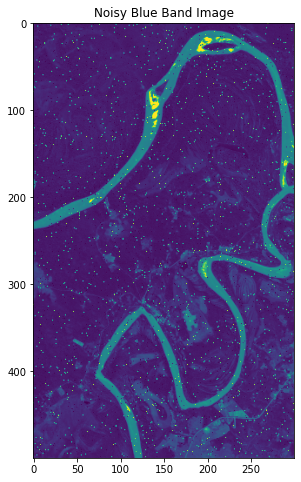

In [11]:
noisy_blue_band = np.load('blue.npy')
print(noisy_blue_band, noisy_blue_band.shape)
plt.figure(figsize=(8,8))
plt.imshow(noisy_blue_band)
plt.title("Noisy Blue Band Image")



In [12]:
# DO NOT EDIT
submission_noisy_img = deepcopy(noisy_blue_band)
###

(500, 300)


Text(0.5, 1.0, 'Denoised Image')

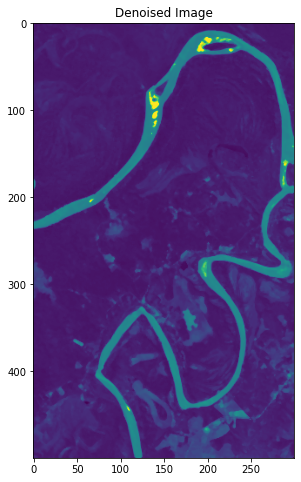

In [13]:
# Denoise the image with a _single_ filter and visualize the result
blue_img = submission_noisy_img.copy() 
print(blue_img.shape)


#Median Filter
denoised_img = ndimage.median_filter(blue_img, size=(3,3), mode='constant')
plt.figure(figsize=(8,8))
plt.imshow(denoised_img)
plt.title("Denoised Image")


Explanation:

Denosing means we want to remove noise from an image. There are several ways of doing it such as Low pass filters, Gaussian filters, 
avergae filtering. However, one of the best filter to remove noise is the median filters.

The image we're provided contains spots. This type of noise is called salt & pepper noise (salt = high pixel values, pepper = low pixel values). The
spots in the image are pepper (low pixel values) while the others have higher pixel values. If we try to use a Low pass filter, we will be able to remove
the low pixel values while not the high pixel values and vice verca. Hence, we can neither use a low pass filter or a high pass filter hence we use
a median filter. 

To further understand the working of a median filter, pls refer to the following website: https://www.youtube.com/watch?v=-eyICcPd-zE

Different kernal sizes were taken into consideration when visualizing an image. If the size of the kernal is too small such as (2,2) then we till see
some spots (low pixel values) in the image however if the kernal size is too large such as (12,12) or (13,13) then the image also starts to fade away.
The best is too keep the size of the kernal between (3,3) - (5,5). Constant: Add an extra column and an extra row towards the end of the image (padding).


In [14]:
# DO NOT EDIT
submission_denoised_img = deepcopy(denoised_img)
###

The noise blue band filter shape is: (500, 300)


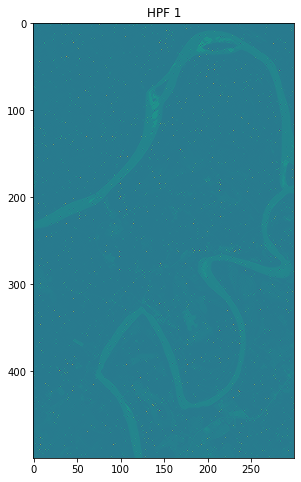

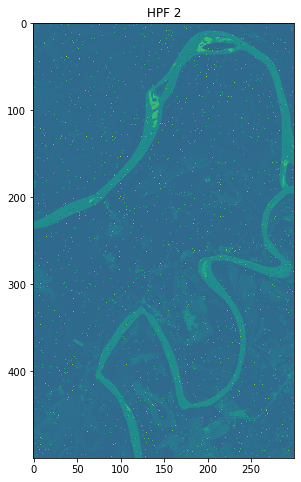

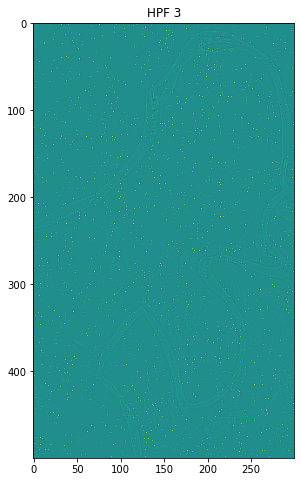

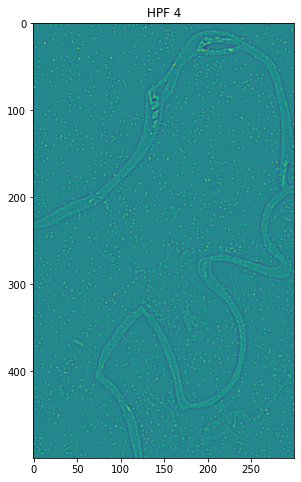

In [15]:
# apply different filter operations with various sizes and
# padding strategies to the denoised image
# try to visualize a couple of outputs that support your
# arguments in the padding-strategy discussion!

"""
This section is divded into several parts:
1) Trying different types of High Pass filter. We also change the size of filter to see its result on the image
2) We use the Gaussian filter and then remove the original image with the Gaussian noise filter to get the high pass filter image. We try it for various
kernel sizes
3) Test high pass filter with various padding strategies
"""




#High pass filters without padding

#We first create four different type of filters

highpass1 = np.array(
    [
        [1, -2, 1],
        [-2, 5, -2],
        [1, -2, 1]
    ]
)
highpass2 = np.array(
[
    [0, -1/4, 0],
    [-1/4, 2, -1/4],
    [0, -1/4, 0]
]
)

highpass3 = np.array(
[
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]]
)
highpass4 = np.array(
    [
        [-1, -1, -1, -1, -1],
        [-1,  1,  2,  1, -1],
        [-1,  2,  4,  2, -1],
        [-1,  1,  2,  1, -1],
        [-1, -1, -1, -1, -1]
    ]
)



highpass_filters = [highpass1, highpass2, highpass3, highpass4]

print("The noise blue band filter shape is:", noisy_blue_band.shape)

conv_results = []
j = 0
for i in highpass_filters:
    results = ndimage.convolve(noisy_blue_band, weights= i)
    conv_results.append(results)
    plt.figure(figsize=(8,8))
    plt.imshow(results)
    plt.title("HPF {}".format(j + 1))
    j+=1
        

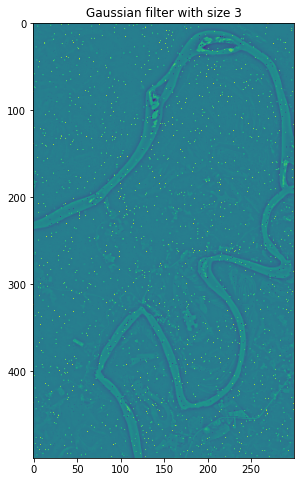

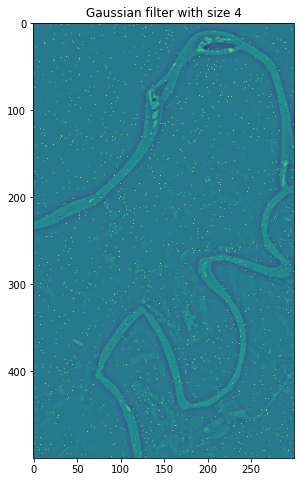

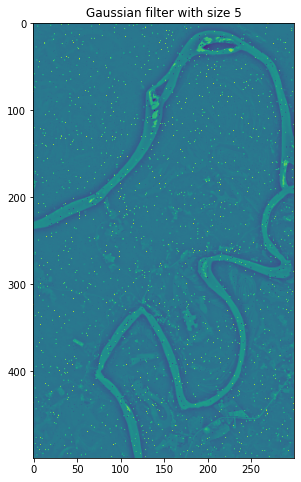

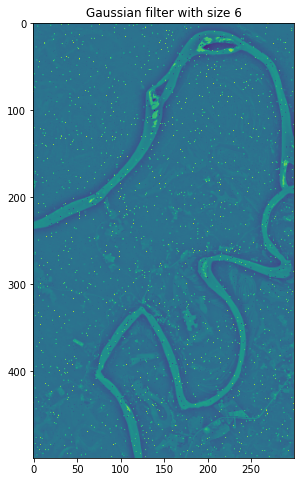

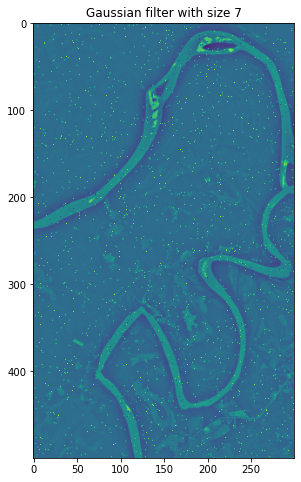

In [16]:
"""    
Another way of making a highpass filter is to simply subtract a lowpass filter. Now we blur the image using a Gaussian filter and then subtract the Low
Pass filter results from the original image.
"""
#Try Gaussian filter for various sizes
for i in range(3, 8):
    Gaussian_lowpass = ndimage.gaussian_filter(noisy_blue_band, i)
    Gauss_highpass = noisy_blue_band - Gaussian_lowpass
    plt.figure(figsize=(8,8))
    plt.imshow(Gauss_highpass)
    plt.title('Gaussian filter with size {}'.format(i))

Kenrel size Effect on Image:

In the first section, we can see that using different type of high pass filters effect the image in different ways. Images from high pass filter 2 provides us with better contrast 
than images from high pass filter 1. Moreover, larger kernels provides us with better contrast of the image. We saw that we can detect edges better with we use High Pass filter of size 
4 rather than size 2 But it also mean more undesirable artifacts as well. For an example, a 7x7 Gaussian would filter out more noise than a 3x3 Gaussian kernel. 
However, the 7x7 would blur out edges more. 

We saw that another way of making a high pass filter is to subtract the original image from the low pass filter image. For that we use a Gaussian filter. We can see that
increasing the size of kernel provides us with better edes/contrast. 

The values were taken from the following link: https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy

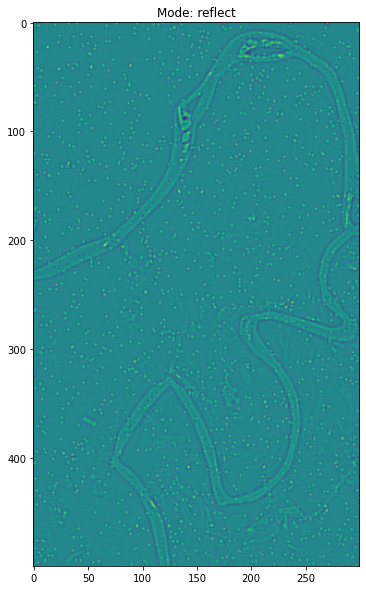

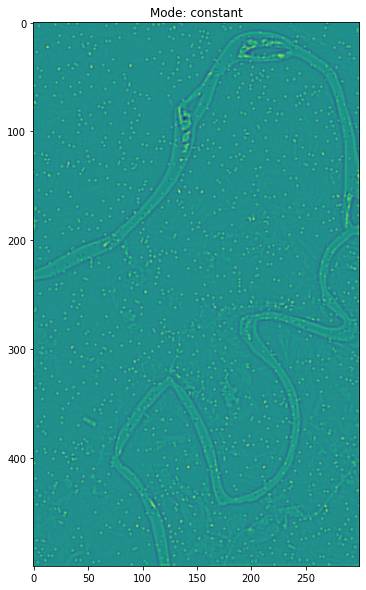

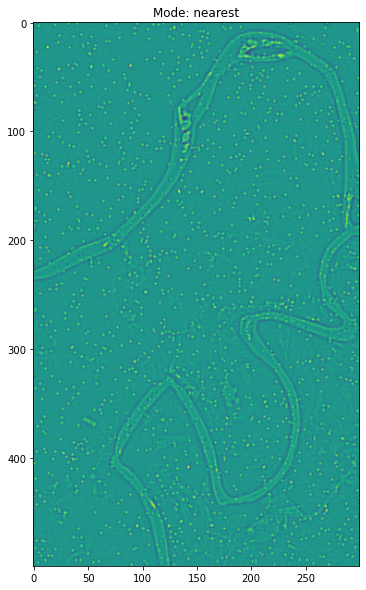

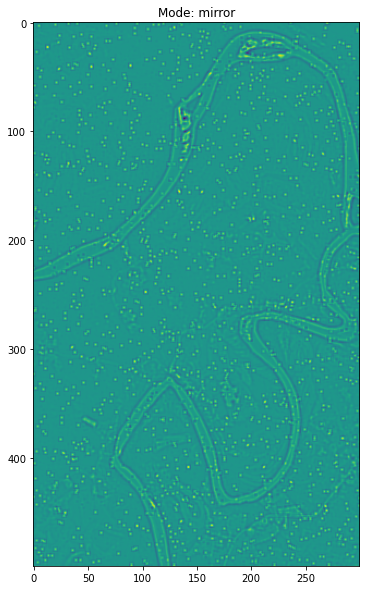

In [17]:
#High pass filters with padding

#High Pass Filter 4 is used

modes = ['reflect','constant','nearest', 'mirror']

conv_results = []

for j in modes:
    results = ndimage.convolve(noisy_blue_band, weights= highpass4, mode= j)
    conv_results.append(results)
    plt.figure(figsize=(10,10))
    plt.imshow(results)
    plt.title("Mode: {}".format(j))
        
      

Padding:

1) Effect of padding on the output?

    In this section, we see the effect of padding while performing convolution. For that we used different padding strategies. Whenever we perform convolution with various kernal sizes, we tend to lost some pixel values. Generally we use small kernals so it we don't lose a lot of
    pixels but if we use larger kernals then it can have a huge impact on the image. 
    1) We perform padding in order to add extra pixels at the end of the image and so to prevent the image from shrinking after convolution
    2) Increase the contribution of pixel at the border of the original image.Hence, information at the border is preserved.
 
2) Effect of different padding strategies on the image?
    1) Using different padding strategies not only have effect on the borders of the image but also on the contrast of the image. For example, using mirror or 
        nearest padding provides us with the better contrast of the image. 
    2) Moreover, the color band of the image slightly changes. For example, if we use constant padding and change its value from 0 - 8, we will see that it changes
        the band colour of the image. For example, the image turns green if you change the constant padding value from 0-8 and its difficult to see the image.


TO understand reflection and constant padding, please refer to the following website: https://kegui.medium.com/image-padding-reflection-padding-d3dee4dc2f63


Add a short discussion about the padding strategy here.

### Creating features

Create an output feature map that highlights the river edges.
- You can apply multiple filter operations after each other to generate the output feature map
- You can arbitrarily compose the intermediate results
    - For example, by adding feature maps of filter responses together
- The final feature map should be normalized to the range between 0 -- 1
- Your strategy _must_ include _custom_ kernels that were not presented in the theoretical lecture

Visually compare your output to the following image:

![](river_edges.png)

> If the image isn't displayed, make sure that the image file is located next to this notebook! Otherwise, manually inspect the provided image file: `river_edges.png`

What is more/less prominent in your image?
Try to provide an intuitive explanation for why your filter composition choice generates the given output.
Motivate your choices and clarify that you haven't applied _random_ kernels to the output!

Target file already exists!
Will skip download. To force download set `force=True`
Target file already exists!
Will skip download. To force download set `force=True`
Target file already exists!
Will skip download. To force download set `force=True`


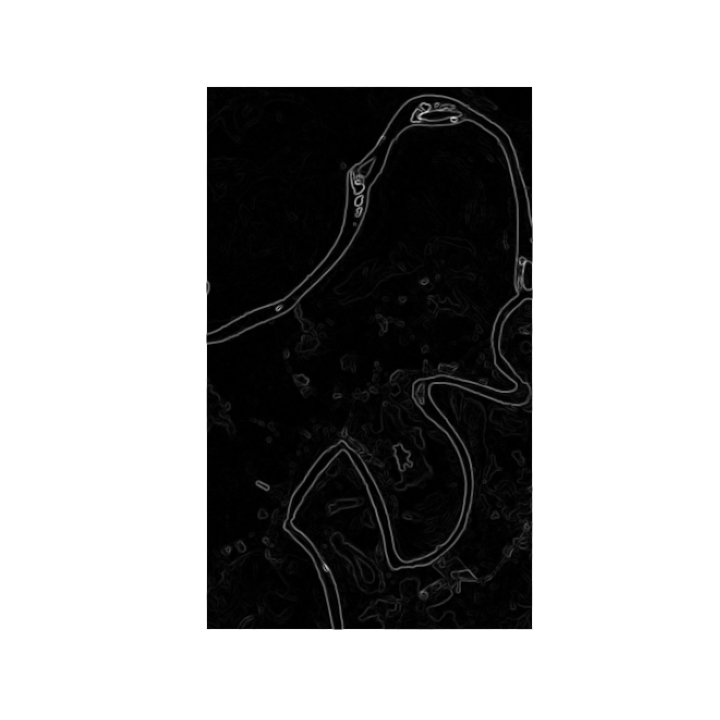

[[0.01244444 0.01866667 0.00622222 ... 0.016      0.02311111 0.02666667]
 [0.01866667 0.032      0.         ... 0.02844444 0.03822222 0.03022222]
 [0.016      0.01066667 0.01422222 ... 0.024      0.01955556 0.02133333]
 ...
 [0.10488889 0.08711111 0.08177778 ... 0.06133333 0.12       0.13777778]
 [0.05866667 0.07733333 0.11022222 ... 0.15466667 0.20711111 0.20177778]
 [0.04177778 0.05333333 0.05244444 ... 0.24088889 0.16088889 0.16      ]]


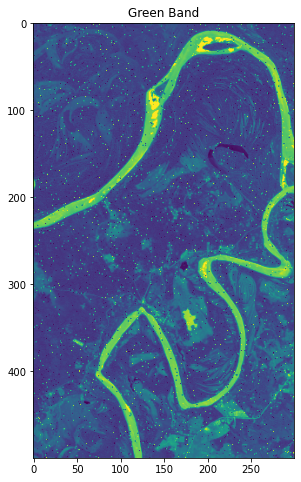

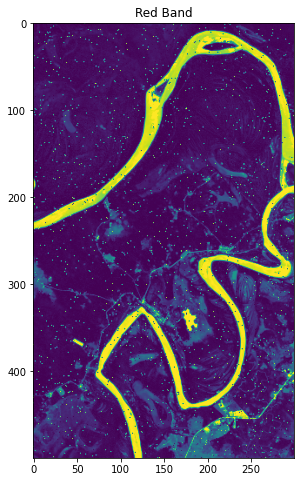

In [22]:
# create complex filter output



green_img = "https://tubcloud.tu-berlin.de/s/QyPmK58foi5qEDg/download/green.npy"
output_file = download(green_img,"")

red_img = "https://tubcloud.tu-berlin.de/s/bHWLkn6CmFWrPbA/download/red.npy"
output_file = download(red_img,"")


final_results = "https://tubcloud.tu-berlin.de/s/RxFbKHrgoFpqGtX/download/river_edges.png"
output_file = download(final_results, "")


#Different bands
green_band = np.load('green.npy')
plt.figure(figsize=(8,8))
plt.title("Green Band")
plt.imshow(green_band)

red_band = np.load('red.npy')
plt.figure(figsize=(8,8))
plt.title("Red Band")
plt.imshow(red_band)

#Results we are trying to acheive
img = Image.open('river_edges.png')
img.show() 







#river_border_features = ...

In [32]:
 from scipy import stats
    
print("Red Band: Max value = {}, Min value = {}, Average value = {}".format(np.max(red_band), np.min(red_band), np.average(red_band)))
print("Green Band: Max value = {}, Min value = {}, Average value = {}".format(np.max(green_band), np.min(green_band), np.average(green_band)))

#For this section, we will use the red band image as it average is lower hence it is easier to find the edges

Red Band: Max value = 1.0, Min value = 0.0, Average value = 0.14935250370370373
Green Band: Max value = 1.0, Min value = 0.0, Average value = 0.28755255703703697


In [13]:
# DO NOT EDIT
submission_river_border_features = deepcopy(river_border_features)
###

## Submission

- Follow the instructions mentioned in this notebook
- You are _not_ allowed to install other libraries
    - The submitted jupyter notebook should be able to run as-is on Paperspace and/or the provided Docker image.
- Explain the steps that went into the decision making of the specific values
- Each homework must be done individually!
- The notebook should have been executed once before submitting it
    - The notebook should _not_ be _cleaned_ before submitting

Each student should submit the following materials to the ISIS system:
- One `zip` file containing the jupyter notebook named as: `IP4RS2022-HW2_<NAME_SURNAME>.zip`



### Submission variables

Please ensure that these variables are correct after you have restarted your notebook and executed all cells from top to bottom.
You are _not allowed_ to modify the following cells:

In [14]:
import rich

rich.print(f"{submission_output_arr_0_pad=}")
rich.print(f"{submission_output_reflect=}")
rich.print(f"{submission_noisy_img}")
rich.print(f"{submission_denoised_img=}")
rich.print(f"{submission_river_border_features}")

submission_output_arr_0_pad=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

submission_output_reflect=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Ellipsis

submission_denoised_img=Ellipsis

Ellipsis